In [27]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd:float
    total_inr:float


In [28]:
def calc_total(state: PortfolioState) -> PortfolioState:
        state["total_usd"] = state["amount_usd"] + 1.08
        return state


In [29]:
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] * 87.50
    return state

In [30]:
from langgraph.graph import StateGraph, START,END

In [31]:
builder=StateGraph(PortfolioState)

builder.add_node("Calculating Total USD",calc_total)

builder.add_node("Converting to INR",convert_to_inr)


In [32]:
builder.add_edge(START,"Calculating Total USD")

builder.add_edge("Calculating Total USD","Converting to INR")

builder.add_edge("Converting to INR",END)

In [33]:
graph=builder.compile()

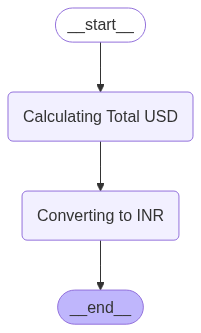

In [34]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
graph.invoke({"amount_usd": 1000})


{'amount_usd': 1000, 'total_usd': 1001.08, 'total_inr': 87594.5}